<a href="https://colab.research.google.com/github/pradeep6296/ANN-Model/blob/main/ANN_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# importing the data
data=pd.read_csv('/content/ANN model data/Churn_Modelling.csv')

In [ ]:
#data.info #data.head()   ---- ignore this cell

In [ ]:
# data split ot dependent and independent cols
x = data.iloc[:, 3:-1]
y = data.iloc[:, 13]

In [ ]:
#x.head()    #y.head()      -----ignore this cell

In [ ]:
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [ ]:
# One hot encoding
x = pd.get_dummies(x, drop_first=True, dtype='int')
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [ ]:
# libraries for preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# train-test splitting
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Scaling the data
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Build ANN Architecture

    # 1. initiate model as sequential
    # 2. add layers (input, hidden, output) along with activation function, weight initializer
    # 3. optimizer, metrics, loss

In [ ]:
# Import required libraries for ANN
import tensorflow as tf               # not mandatory if tf version is > 2.0
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# Building ANN Architecture

# --- FEED FORWARD MECHANISM --- # (Forward Propagation)
# initialise the model
model = Sequential()
# Building the layers
# input layer
model.add(Dense(units=11, kernel_initializer='he_uniform', input_dim=11))
# first hidden layer
model.add(Dense(units=8, activation='relu', kernel_initializer='he_uniform'))
# second hidden layer
model.add(Dense(units=6, activation='relu', kernel_initializer='he_uniform'))
# output layer
model.add(Dense(units=1, activation='sigmoid'))
# --- BACKWARD PROPOAGATION --- #
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 8)                   │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 6)                   │              54 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 289 (1.13 KB)

 Trainable params: 289 (1.13 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Fitting the data insidde the model architecture
model_history = model.fit(x_train, y_train, validation_split=0.3, batch_size=10, epochs=100)

Epoch 1/100
560/560 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6413 - loss: 0.6814 - val_accuracy: 0.7862 - val_loss: 0.4817
Epoch 2/100
560/560 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7956 - loss: 0.4692 - val_accuracy: 0.7883 - val_loss: 0.4599
Epoch 3/100
560/560 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8017 - loss: 0.4502 - val_accuracy: 0.8058 - val_loss: 0.4456
Epoch 4/100
560/560 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7971 - loss: 0.4399 - val_accuracy: 0.8100 - val_loss: 0.4387
Epoch 5/100
560/560 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8179 - loss: 0.4118 - val_accuracy: 0.8058 - val_loss: 0.4372
Epoch 6/100
560/560 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8093 - loss: 0.4217 - val_accuracy: 0.8175 - val_loss: 0.4274
Epoch 7/100
560/560 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8231 - loss: 0.4111 - val_accuracy: 0.8242 - val_loss: 0.4237
Epoch 8/100
560/560 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8254 - loss: 0.4023 - val_accu

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


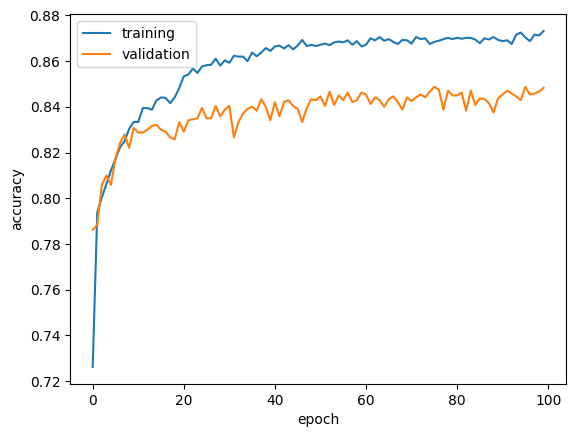

In [ ]:
# plot the accuracy vs val_accuracy
print(model_history.history.keys())

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'])
plt.show()

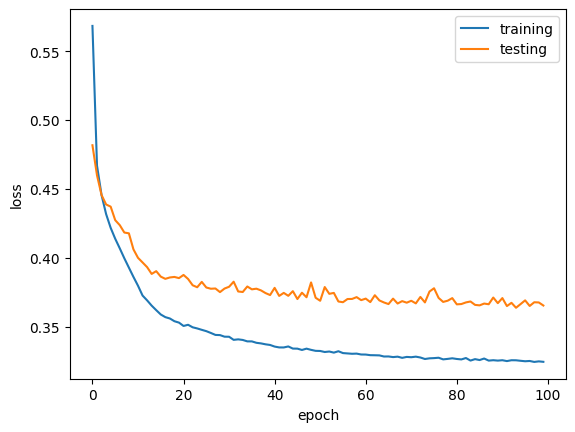

In [ ]:
# plot the loss vs val_loss

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'testing'])
plt.show()

In [ ]:
# predicting the results
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.45      0.56       393

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000

0.8615


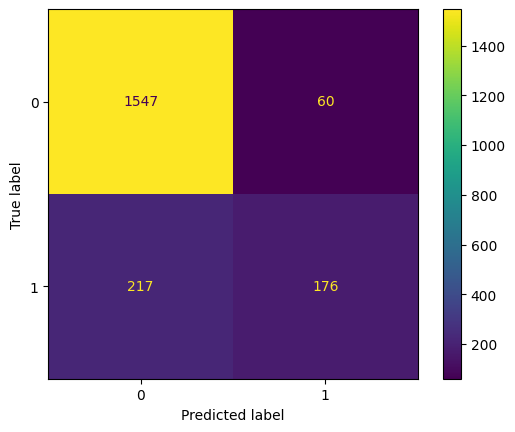

In [ ]:
# Confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
print(cm)

# classification report
report = classification_report(y_test, y_pred)
print(report)

# Calculate accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
print(score)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')